Epoch 0, loss 19.43591979457613
[array([[ 0.25555192, -0.52324339,  0.23357597],
       [ 2.10797427, -2.6893862 ,  0.473766  ]]), array([[-1.04515524e+00,  7.52463490e-04, -6.34227563e-01,
         2.34142892e-01, -2.40230985e+00,  1.13903984e+00,
         2.05934241e+00,  2.33609222e-01],
       [ 9.93902931e-01, -8.03312723e-01,  8.26710356e-01,
        -3.17893235e-01,  3.82423370e+00, -2.31273984e+00,
        -3.84947566e+00, -6.60662243e-01],
       [ 4.55850831e-02, -6.90955042e-02,  6.14410157e-01,
         3.78053353e-02, -8.28193966e-01,  7.77613474e-01,
         9.08098294e-01, -1.85722875e-01]]), array([[-0.52155768,  0.49309066, -0.9166781 ,  0.87720954],
       [ 0.18440917,  0.06637511,  0.26381238, -0.47605865],
       [-0.32311991,  0.43119682, -0.60985175,  0.56950868],
       [ 0.00398268, -0.03997736,  0.19827106, -0.25734026],
       [-2.05861126,  1.21252707, -2.84123831,  3.34963095],
       [ 1.06129067, -0.73458716,  1.70083019, -1.58306082],
       [ 1.7570851

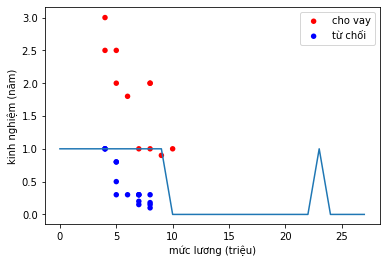

In [2]:

# Thêm thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Hàm sigmoid
def sigmoid(x):
        return 1/(1+np.exp(-x)) 

# Đạo hàm hàm sigmoid
def sigmoid_derivative(x):
        return x*(1-x) 

class NN:
    def __init__(self, layers, X, y, y_predict=None, lr =0.1, num_iters=100):
        self.X = X
        self.y = y
        self.y_predict = y_predict
        self.lr = lr
        self.layers = layers
        self.num_iters = num_iters
        self.weight = []
        self.bias = []

          # Khởi tạo các tham số ở mỗi layer
        for i in range(0, len(layers)-1):
            _w = np.random.randn(layers[i], layers[i+1])
            _b = np.zeros((layers[i+1], 1))
            self.weight.append(_w/layers[i])
            self.bias.append(_b) 

        
    def fit_partial(self, x, y):
        A = [x] 
        # quá trình feedforward
        out = A[-1] 
        for i in range(0, len(self.layers) - 1):
            out = sigmoid(np.dot(out, self.weight[i]) + (self.bias[i].T))
            A.append(out)
        
        # quá trình backpropagation
        y = y.reshape(-1, 1)
        dA = [-(y/A[-1] - (1-y)/(1-A[-1]))]
        dW = []
        db = []
        for i in reversed(range(0, len(self.layers)-1)):
            dw_ = np.dot((A[i]).T, dA[-1] * sigmoid_derivative(A[i+1]))
            db_ = (np.sum(dA[-1] * sigmoid_derivative(A[i+1]), 0)).reshape(-1,1)
            dA_ = np.dot(dA[-1] * sigmoid_derivative(A[i+1]), self.weight[i].T)
            dW.append(dw_)
            db.append(db_)
            dA.append(dA_)
        
        # Đảo ngược dW, db
        dW = dW[::-1]
        db = db[::-1] 
        
		# Gradient descent
        for i in range(0, len(self.layers)-1):
            self.weight[i] = self.weight[i] - self.lr * dW[i]
            self.bias[i] = self.bias[i] - self.lr * db[i]

    def fit(self, X, y, epochs=20, verbose=10):
        for epoch in range(0, epochs):
            self.fit_partial(X, y)
            if epoch % verbose == 0:
                loss = self.calculate_loss(X, y)
                print("Epoch {}, loss {}".format(epoch, loss))
    
      
	# Dự đoán
    def predict(self, X):
        for i in range(0, len(self.layers) - 1):
            X = sigmoid(np.dot(X, self.weight[i]) + (self.bias[i].T))
        return X

    def draw(self):
        # t = 0.4
        y_predict = self.predict(X)
        plt.plot(y_predict)
        t = 0.5
        print(self.weight)
#         plt.plot((4, 10),(-(self.weight[-1][0]+4*self.weight[-1][1]+ np.log(1/t-1))/self.weight[-1][2], -(self.weight[-1][0] + 10*self.weight[-1][1]+ np.log(1/t-1))/self.weight[-1][2]), 'g')
        plt.show() 

	# Tính loss function
    def calculate_loss(self, X, y):
        y_predict = self.predict(X)
        #return np.sum((y_predict-y)**2)/2
        return -(np.sum(y*np.log(y_predict) + (1-y)*np.log(1-y_predict))) 
        
if __name__ == '__main__':
    # Dataset bài 2
    data = pd.read_csv('dataset.csv').values
    N, d = data.shape
    X = data[:, 0:d-1].reshape(-1, d-1)
    y = data[:, 2].reshape(-1, 1)

    # Vẽ data bằng scatter
    x_cho_vay = X[y[:,0]==1]
    x_tu_choi = X[y[:,0]==0]

    plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
    plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
    plt.legend(loc=1)
    plt.xlabel('mức lương (triệu)')
    plt.ylabel('kinh nghiệm (năm)')

    p = NN(layers = [X.shape[1], 3, 8, 4, 2, 1], X = X, y= y, lr = 0.01, num_iters=10000)
    p.fit(X, y, 100000, 100000)
    p.draw()

In [ ]:
p.weight

In [ ]:

# Hàm sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x)) 

# Đạo hàm hàm sigmoid
def sigmoid_derivative(x):
    return x*(1-x) 